# CNN-LSTM

In [163]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [164]:
#loading dataset

dataset = pd.read_csv('/content/PFE .csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,30.218216,30.388994,29.952562,30.313093,23.628897,39322421
1,2016-01-05,30.531309,30.588236,30.294119,30.531309,23.798998,28777994
2,2016-01-06,30.104364,30.265656,29.810247,29.990513,23.377451,27242316
3,2016-01-07,29.563566,30.180265,29.544592,29.791271,23.222141,39223134
4,2016-01-08,29.933586,30.009487,29.335863,29.411764,22.926319,34840286
...,...,...,...,...,...,...,...
1505,2021-12-23,59.820000,60.080002,58.310001,58.709999,57.350655,39203200
1506,2021-12-27,58.849998,59.380001,58.230000,59.200001,57.829311,27362600
1507,2021-12-28,59.049999,59.450001,57.080002,58.009998,56.666862,36901700
1508,2021-12-29,57.310001,58.029999,57.070000,57.580002,56.246819,26170200


In [165]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [166]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,35.925691,36.241104,35.599440,35.924678,31.623483,2.805684e+07
std,4.995178,5.107963,4.901482,5.015823,6.086928,1.698271e+07
min,27.011385,27.495256,26.451612,27.030361,21.334143,5.187683e+06
25%,32.438332,32.706355,32.239090,32.471536,26.610575,1.881614e+07
50%,34.767554,35.000000,34.497154,34.724857,31.125706,2.395695e+07
75%,39.117645,39.485750,38.865001,39.182499,34.902448,3.203235e+07
max,60.599998,61.709999,59.830002,61.250000,59.831844,2.998294e+08


In [167]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [168]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,30.218216,30.388994,29.952562,30.313093,23.628897,39322421
1,2016-01-05,30.531309,30.588236,30.294119,30.531309,23.798998,28777994
2,2016-01-06,30.104364,30.265656,29.810247,29.990513,23.377451,27242316
3,2016-01-07,29.563566,30.180265,29.544592,29.791271,23.222141,39223134
4,2016-01-08,29.933586,30.009487,29.335863,29.411764,22.926319,34840286


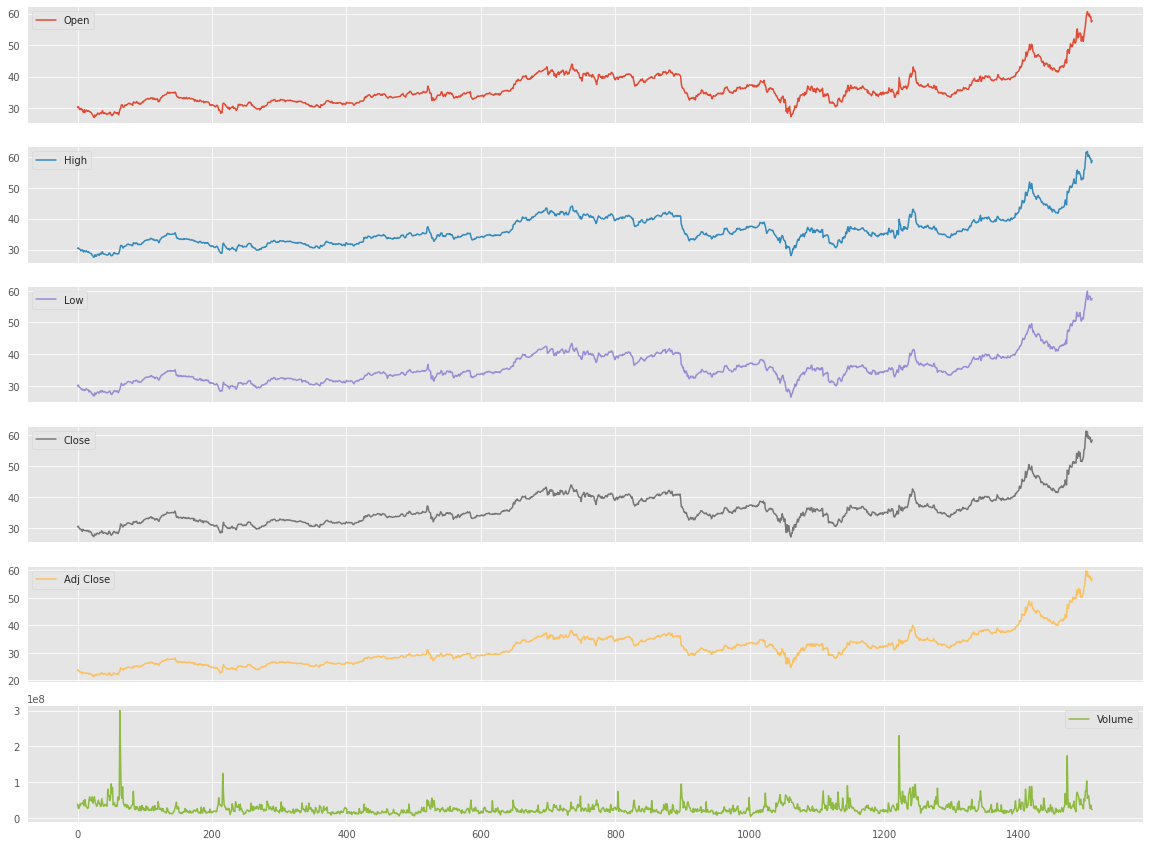

In [169]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

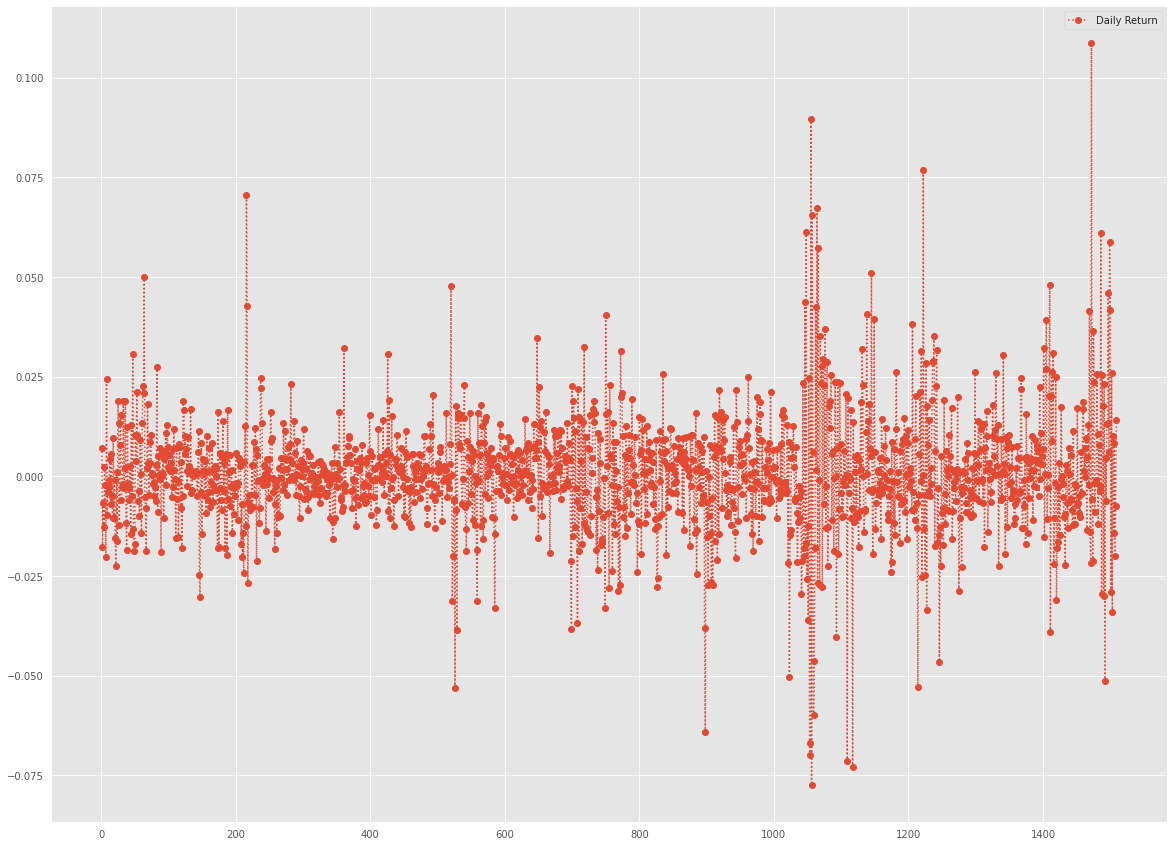

In [170]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

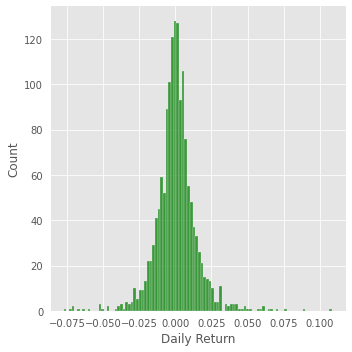

In [171]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [172]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2016-01-04,30.218216,30.388994,29.952562,30.313093,23.628897,39322421,35.874677,35.732354,35.667139,0.000541
1,2016-01-05,30.531309,30.588236,30.294119,30.531309,23.798998,28777994,35.874677,35.732354,35.667139,0.007199
2,2016-01-06,30.104364,30.265656,29.810247,29.990513,23.377451,27242316,35.874677,35.732354,35.667139,-0.017713
3,2016-01-07,29.563566,30.180265,29.544592,29.791271,23.222141,39223134,35.874677,35.732354,35.667139,-0.006644
4,2016-01-08,29.933586,30.009487,29.335863,29.411764,22.926319,34840286,35.874677,35.732354,35.667139,-0.012739


In [173]:
dataset.nunique()

Date                  1510
Open                  1029
High                  1036
Low                   1026
Close                 1011
Adj Close             1366
Volume                1506
M_avg for 10 days     1492
M_avg for 50 days     1459
M_avg for 100 days    1410
Daily Return          1485
dtype: int64

In [174]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,23.628897,30.313093,0.000541,2016-01-04,30.388994,29.952562,35.874677,35.667139,35.732354,30.218216,39322421
1,23.798998,30.531309,0.007199,2016-01-05,30.588236,30.294119,35.874677,35.667139,35.732354,30.531309,28777994
2,23.377451,29.990513,-0.017713,2016-01-06,30.265656,29.810247,35.874677,35.667139,35.732354,30.104364,27242316
3,23.222141,29.791271,-0.006644,2016-01-07,30.180265,29.544592,35.874677,35.667139,35.732354,29.563566,39223134
4,22.926319,29.411764,-0.012739,2016-01-08,30.009487,29.335863,35.874677,35.667139,35.732354,29.933586,34840286
...,...,...,...,...,...,...,...,...,...,...,...
1505,57.350655,58.709999,-0.014106,2021-12-23,60.080002,58.310001,58.128000,47.693900,49.970000,59.820000,39203200
1506,57.829311,59.200001,0.008346,2021-12-27,59.380001,58.230000,58.770000,47.834000,50.320600,58.849998,27362600
1507,56.666862,58.009998,-0.020101,2021-12-28,59.450001,57.080002,59.051000,47.963500,50.651000,59.049999,36901700
1508,56.246819,57.580002,-0.007412,2021-12-29,58.029999,57.070000,59.255000,48.088600,50.976200,57.310001,26170200


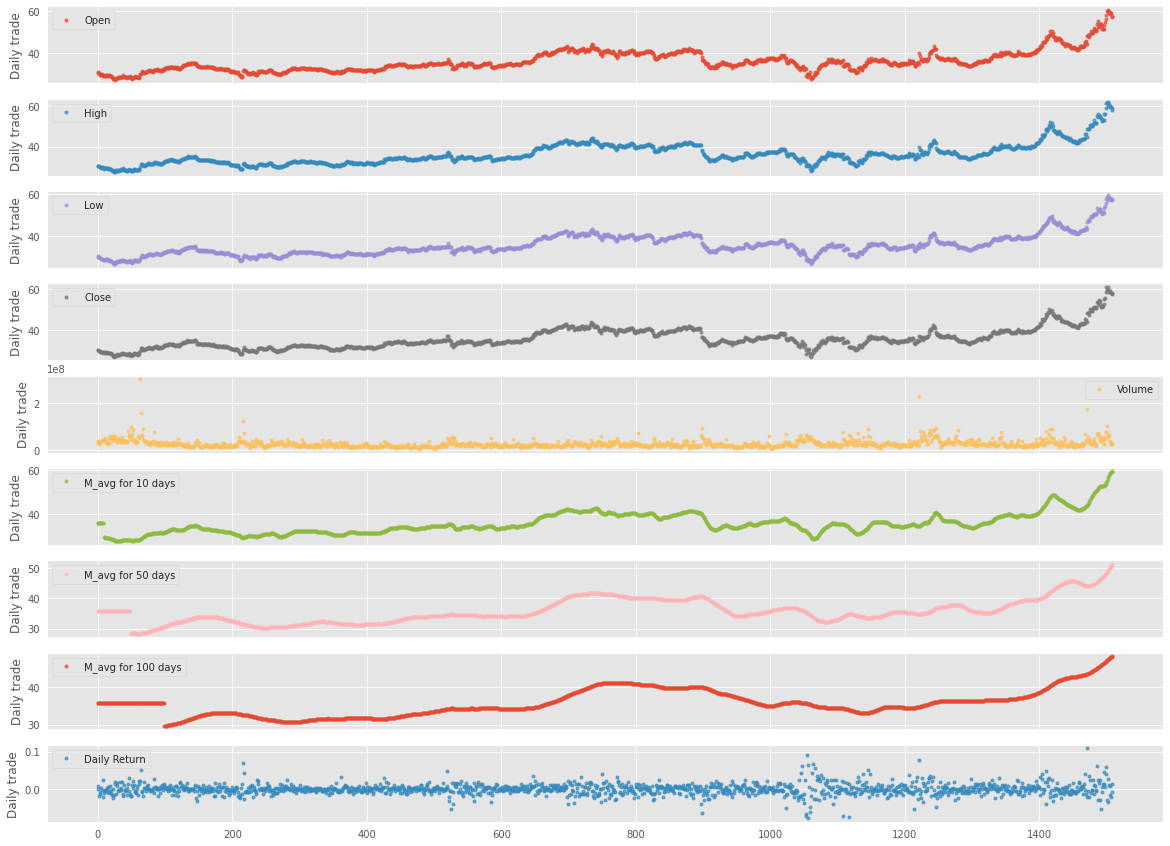

In [175]:
# plotting every column of the dataset

cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

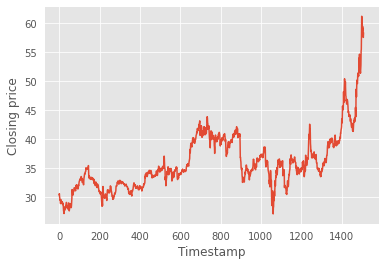

In [176]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [177]:
df = dataset
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2016-01-04  30.218216  30.388994  29.952562  30.313093  23.628897   
1     2016-01-05  30.531309  30.588236  30.294119  30.531309  23.798998   
2     2016-01-06  30.104364  30.265656  29.810247  29.990513  23.377451   
3     2016-01-07  29.563566  30.180265  29.544592  29.791271  23.222141   
4     2016-01-08  29.933586  30.009487  29.335863  29.411764  22.926319   
...          ...        ...        ...        ...        ...        ...   
1505  2021-12-23  59.820000  60.080002  58.310001  58.709999  57.350655   
1506  2021-12-27  58.849998  59.380001  58.230000  59.200001  57.829311   
1507  2021-12-28  59.049999  59.450001  57.080002  58.009998  56.666862   
1508  2021-12-29  57.310001  58.029999  57.070000  57.580002  56.246819   
1509  2021-12-30  57.750000  58.740002  57.529999  58.400002  57.047832   

        Volume  M_avg for 10 days  M_avg for 50 days  M_avg for 100 days  \
0     39322421         

In [178]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [179]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1510.0,3.592569e+01,4.995178e+00,2.701139e+01,3.243833e+01,3.476755e+01,3.911765e+01,6.060000e+01
High,1510.0,3.624110e+01,5.107963e+00,2.749526e+01,3.270635e+01,3.500000e+01,3.948575e+01,6.171000e+01
Low,1510.0,3.559944e+01,4.901482e+00,2.645161e+01,3.223909e+01,3.449715e+01,3.886500e+01,5.983000e+01
Close,1510.0,3.592468e+01,5.015823e+00,2.703036e+01,3.247154e+01,3.472486e+01,3.918250e+01,6.125000e+01
Adj Close,1510.0,3.162348e+01,6.086928e+00,2.133414e+01,2.661057e+01,3.112571e+01,3.490245e+01,5.983184e+01
Volume,1510.0,2.805684e+07,1.698271e+07,5.187683e+06,1.881614e+07,2.395695e+07,3.203235e+07,2.998294e+08
M_avg for 10 days,1510.0,3.587468e+01,4.800302e+00,2.776660e+01,3.251992e+01,3.471300e+01,3.926025e+01,5.925500e+01
M_avg for 50 days,1510.0,3.573235e+01,4.011395e+00,2.832429e+01,3.295403e+01,3.480844e+01,3.846846e+01,5.130240e+01
M_avg for 100 days,1510.0,3.566714e+01,3.498625e+00,2.961575e+01,3.308662e+01,3.520844e+01,3.743155e+01,4.821280e+01
Daily Return,1510.0,5.410082e-04,1.460962e-02,-7.734642e-02,-5.970088e-03,2.637974e-04,6.844685e-03,1.085520e-01


In [180]:
df_close = df.reset_index()['Close']

In [181]:
df_close

0       30.313093
1       30.531309
2       29.990513
3       29.791271
4       29.411764
          ...    
1505    58.709999
1506    59.200001
1507    58.009998
1508    57.580002
1509    58.400002
Name: Close, Length: 1510, dtype: float64

In [182]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [183]:
df_close = pd.DataFrame(df_close)

In [184]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [185]:
train_data

0       0.095931
1       0.102308
2       0.086504
3       0.080682
4       0.069592
          ...   
1127    0.106190
1128    0.098427
1129    0.115062
1130    0.116726
1131    0.145560
Name: 0, Length: 1132, dtype: float64

In [186]:
test_data

1132    0.166909
1133    0.166909
1134    0.153601
1135    0.145838
1136    0.137797
          ...   
1505    0.925774
1506    0.940093
1507    0.905317
1508    0.892752
1509    0.916715
Name: 0, Length: 378, dtype: float64

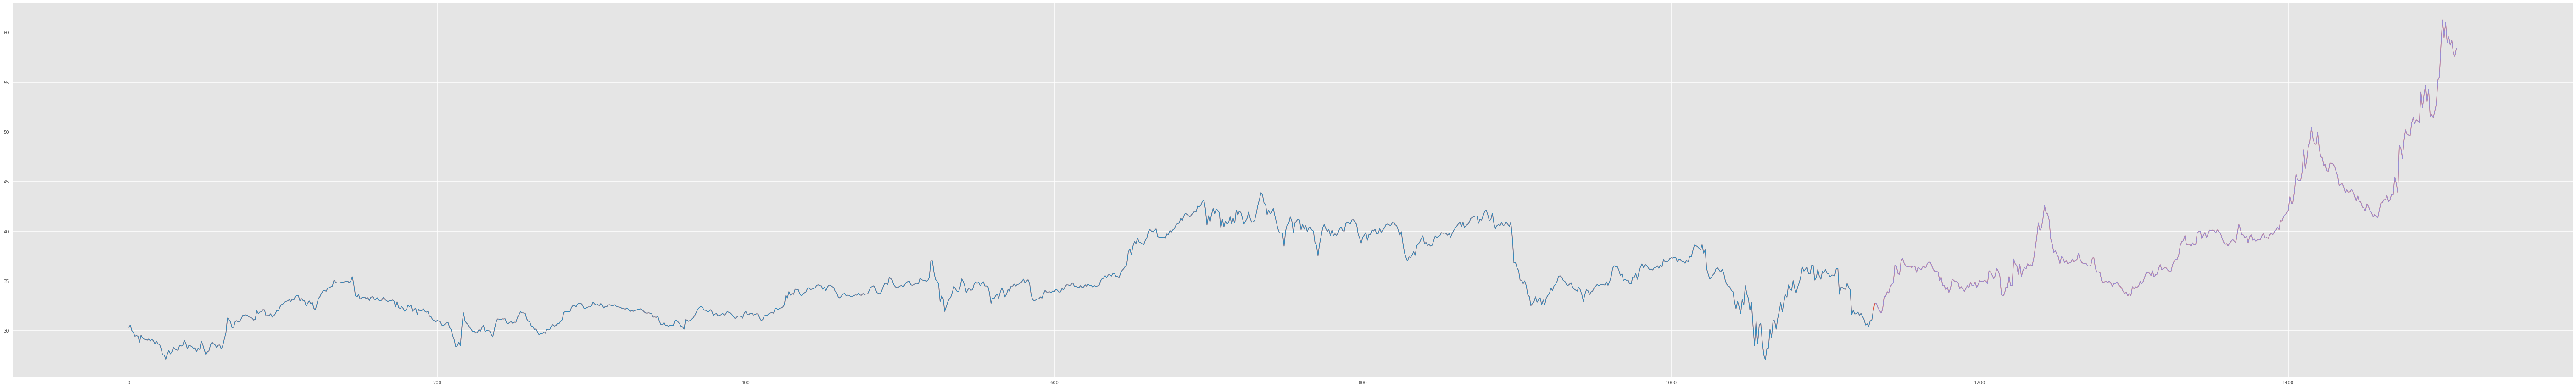

In [187]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.plot(scaler.inverse_transform(test_dataPlot))

plt.show()

In [188]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [189]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [190]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [191]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [192]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [193]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
29/29 [==============================] - 13s 122ms/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1026 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.0753
Epoch 2/40
29/29 [==============================] - 1s 50ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0712 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0541
Epoch 3/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0635 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0460
Epoch 4/40
29/29 [==============================] - 2s 53ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0571 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0451
Epoch 5/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0527 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0420
Epoch 6/40
29/29 [==============================] - 2s 52ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0478 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0477
Epoch 7/40
29/29 [==

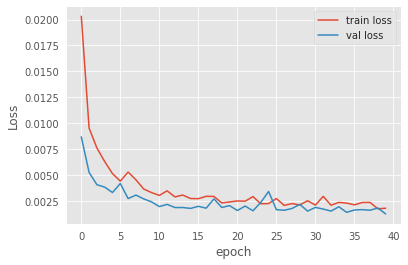

In [194]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

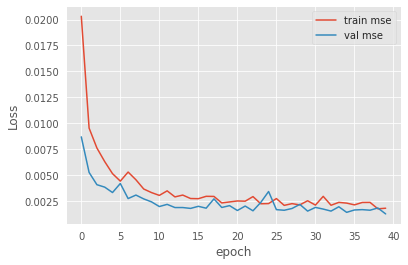

In [195]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


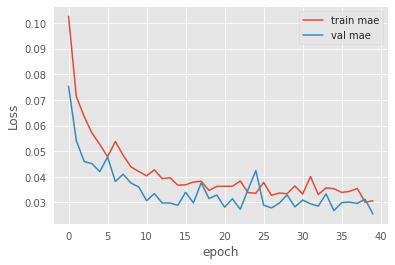

In [196]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [197]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_28 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (None, 1, 21, 128)      

In [198]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 16ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0255


[0.0012377791572362185, 0.0012377791572362185, 0.025529824197292328]

In [199]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.933009
R2 Score: 0.933009
Max Error: 0.144601


9/9 [==============================] - 0s 14ms/step


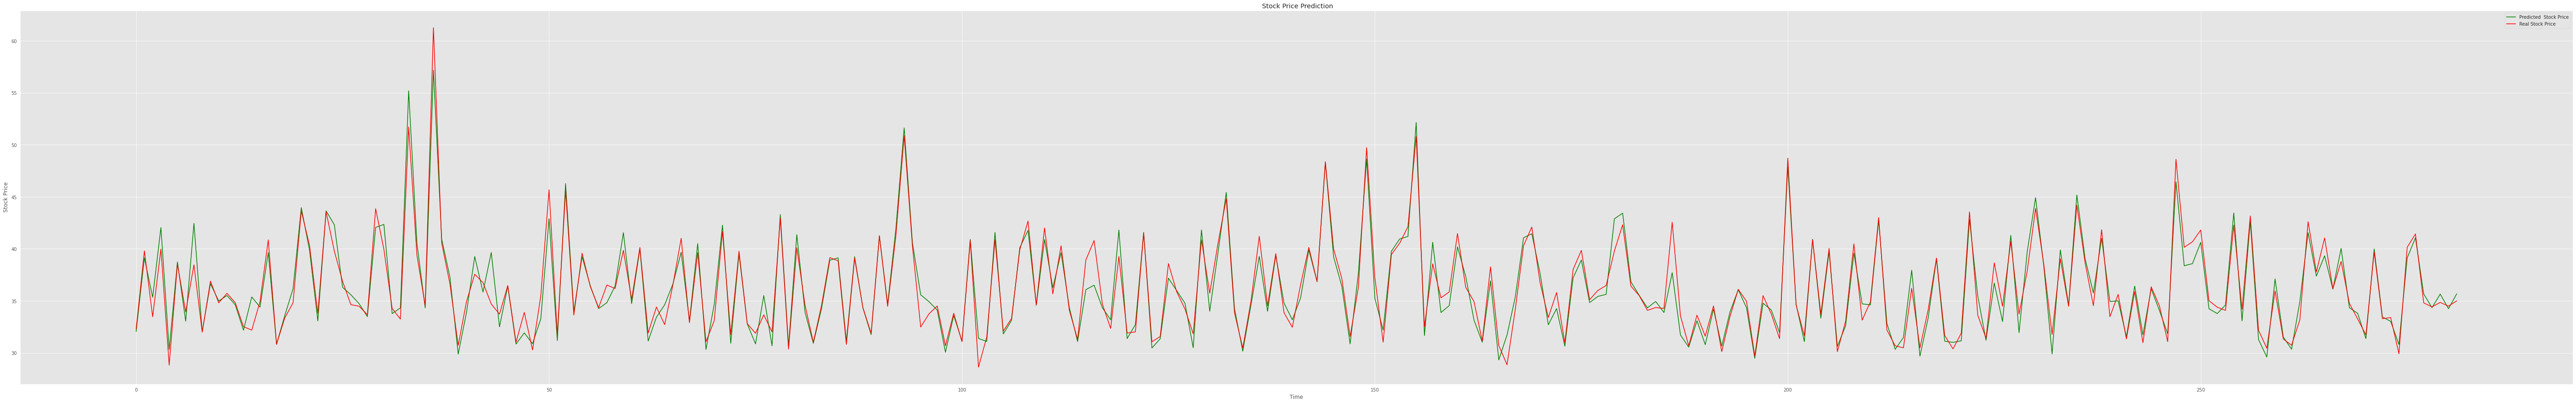

In [200]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [201]:
scaler.inverse_transform(predicted)

array([[32.05265 ],
       [39.140656],
       [35.34342 ],
       [42.051384],
       [30.325352],
       [38.739544],
       [33.05128 ],
       [42.45307 ],
       [32.048115],
       [36.656708],
       [34.994278],
       [35.51597 ],
       [34.62624 ],
       [32.186325],
       [35.37806 ],
       [34.404613],
       [39.65121 ],
       [30.83056 ],
       [33.598953],
       [36.172264],
       [43.95919 ],
       [39.855846],
       [33.077682],
       [43.64742 ],
       [42.317013],
       [36.302464],
       [35.59152 ],
       [34.733406],
       [33.488865],
       [42.061523],
       [42.350105],
       [33.781418],
       [34.329514],
       [55.188072],
       [40.541737],
       [34.324944],
       [57.17081 ],
       [40.932842],
       [37.28185 ],
       [29.88955 ],
       [33.877586],
       [39.26339 ],
       [35.852386],
       [39.654064],
       [32.505455],
       [36.4249  ],
       [30.849947],
       [31.928953],
       [30.88906 ],
       [33.27371 ],


In [202]:
scaler.inverse_transform(test_label)

array([[32.296017],
       [39.810001],
       [33.472485],
       [39.981026],
       [28.823528],
       [38.529411],
       [33.937382],
       [38.472485],
       [31.992411],
       [36.897533],
       [34.810246],
       [35.730549],
       [34.829224],
       [32.52372 ],
       [32.19165 ],
       [34.933586],
       [40.863377],
       [30.825426],
       [33.368122],
       [34.82    ],
       [43.639999],
       [40.322582],
       [33.804554],
       [43.57    ],
       [39.781784],
       [36.869999],
       [34.639469],
       [34.487667],
       [33.671726],
       [43.861481],
       [39.95256 ],
       [34.278938],
       [33.254269],
       [51.720001],
       [39.392788],
       [34.563568],
       [61.25    ],
       [40.559772],
       [36.619999],
       [30.721064],
       [34.933586],
       [37.561668],
       [36.755219],
       [34.705883],
       [33.728653],
       [36.48    ],
       [31.034157],
       [33.899429],
       [30.28463 ],
       [35.493359],
